In [1]:
!git clone https://github.com/Tarandro/BinaryML_churn.git

Cloning into 'BinaryML_churn'...
remote: Enumerating objects: 229, done.
remote: Counting objects: 100% (229/229), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 229 (delta 93), reused 216 (delta 80), pack-reused 0
Receiving objects: 100% (229/229), 3.28 MiB | 15.54 MiB/s, done.
Resolving deltas: 100% (93/93), done.


In [2]:
import os
fd = os.open( "/kaggle/working/BinaryML_churn", os.O_RDONLY )
os.fchdir(fd)
os.getcwd()

'/kaggle/working/BinaryML_churn'

In [3]:
import pandas as pd
from binaryML import BinaryML

✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_md')


In [4]:
#####################
# Parameters
#####################

objective = 'text_binary'  # or 'text_binary'            ('binary_proba' : predict proba and 'binary' : predict 0 or 1)
target = 'sentiment'

column_text = 'text'  # (column with texts)

frac = 0.8  # train_test_split fraction                 (data is split in train/test with frac = % for training dataset)

max_run_time_per_modele = 20  # (limit gridsearch time for each model)

scoring = 'f1'  # ['accuracy','f1','recall','precision','roc_auc']
sort_leaderboard = 'f1'  # ['accuracy','f1','recall','precision','roc_auc']

# number of folds during gridsearch and validation :
nfolds = 5

class_weight = True

apply_stacking = False
apply_blend_model = True

# show result:
print_result = True
# list of models to exclude :
exclude_model = []  # FastText work only with pre-training dataset on kaggle (see url method_embedding)
                    # Need GPU for BERT
# NLP : ['tf-idf+Naive_Bayes', 'tf-idf+SGDClassifier', 'tf-idf+Logistic_Regression', 'Fasttext_Attention', 'BERT']

method_embedding = {'Fasttext_Attention': '/kaggle/input/fasttext-french-2b-300d/cc.fr.300.vec',
                    'BERT': 'CamemBERT',
                    'spacy': [('all', False), (['ADJ', 'NOUN', 'VERB', 'DET'], False),
                              (['ADJ', 'NOUN'], True)]}

# Read Data

In [5]:
data = pd.read_csv('./data/TrustPilot_data.csv')
data = data[~data.text.isnull()].reset_index(drop=True)
data['sentiment'] = data.star.map({5: 1, 4: 1, 3: 0, 2: 0, 1: 0})
data.head()

,title,date,star,text,sentiment
0,Excellent,2021-01-02T10:01:14+00:00,5,"Très bien, service parfait et rapide.",1
1,"Bonjour,",2021-01-01T14:54:01+00:00,5,"Bonjour,J'étais bien reçue par Monsieur Antony...",1
2,Bonjour.compte bloqué,2020-12-30T20:29:03+00:00,1,"Bonjour.compte bloqué. .carte ,retrait,viremen...",0
3,ORANGE BANK ou la banque de DINGO,2020-12-30T19:22:00+00:00,1,ORANGE BANK ou votre interlocueteur est le ROB...,0
4,Très pratique,2020-12-30T17:16:37+00:00,5,"Très pratique, je peux à tout moment bloquer l...",1


In [6]:
bml = BinaryML(scoring=scoring, objective=objective, nfolds=nfolds, class_weight=class_weight,
                   print_result=print_result, max_run_time_per_modele=max_run_time_per_modele,
                   apply_stacking=apply_stacking, apply_blend_model=apply_blend_model, exclude_model=exclude_model,
                   method_embedding=method_embedding)

# Preprocessing

In [7]:
bml.data_preprocessing(data, target=target, column_text=column_text, frac=frac)

In [8]:
# data after preprocessing :
bml.data

,text
0,"Très bien, service parfait et rapide."
1,"Bonjour,J'étais bien reçue par Monsieur Antony..."
2,"Bonjour.compte bloqué. .carte ,retrait,viremen..."
3,ORANGE BANK ou votre interlocueteur est le ROB...
4,"Très pratique, je peux à tout moment bloquer l..."
...,...
393,Impossible d'ouvrir un compte. Bugs en plein m...
394,"Attention Orange bank fait du fishing, ils réc..."
395,Après plusieurs refus d'ouverture d'un compte ...
396,Bugs très graves de l’appli. Souvent on ne peu...


# Training


tf-idf+Naive_Bayes Model : 

  Total time : 16.131 and n_iter : 38
Best parameters:  {'clf__alpha': 0.006645763131179594, 'vect__tfidf__binary': False, 'vect__tfidf__lowercase': True, 'vect__tfidf__ngram_range': (1, 2), 'vect__tfidf__stop_words': None}
Mean cross-validated score of the best_estimator:  0.7867


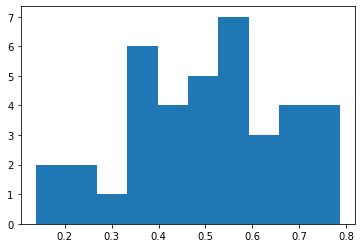

Time search : 16.323655902999917

Cross validation score :

roc_auc = 0.8172
precision 1 = 0.9259
recall 1 = 0.6637
f1 score 1 = 0.7732

              precision    recall  f1-score   support

           0      0.840     0.971     0.900       205
           1      0.926     0.664     0.773       113

    accuracy                          0.862       318
   macro avg      0.883     0.817     0.837       318
weighted avg      0.870     0.862     0.855       318

Time validation : 0.4138323799998034

tf-idf+SGDClassifier Model : 

  Total time : 18.783 and n_iter : 17
Best parameters:  {'clf__alpha': 0.0004430877988861491, 'clf__loss': 'modified_huber', 'clf__penalty': 'l2', 'vect__text__reduce_dim': None, 'vect__text__tfidf__binary': True, 'vect__text__tfidf__lowercase': True, 'vect__text__tfidf__ngram_range': (1, 2), 'vect__text__tfidf__stop_words': None}
Mean cross-validated score of the best_estimator:  0.813


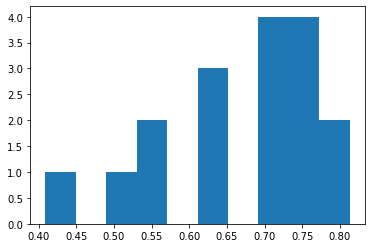

Time search : 18.96792770000002

Cross validation score :

roc_auc = 0.8623
precision 1 = 0.8103
recall 1 = 0.8319
f1 score 1 = 0.821

              precision    recall  f1-score   support

           0      0.906     0.893     0.899       205
           1      0.810     0.832     0.821       113

    accuracy                          0.871       318
   macro avg      0.858     0.862     0.860       318
weighted avg      0.872     0.871     0.871       318

Time validation : 0.7691688570000679

tf-idf+Logistic_Regression Model : 

  Total time : 27.616 and n_iter : 12
Best parameters:  {'clf__C': 1.2543648696026197, 'clf__penalty': 'l1', 'vect__text__reduce_dim': TruncatedSVD(n_components=20), 'vect__text__tfidf__binary': True, 'vect__text__tfidf__lowercase': True, 'vect__text__tfidf__ngram_range': (1, 1), 'vect__text__tfidf__stop_words': True}
Mean cross-validated score of the best_estimator:  0.8319


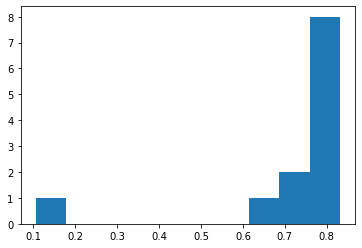

Time search : 27.82095212100012

Cross validation score :

roc_auc = 0.874
precision 1 = 0.8333
recall 1 = 0.8407
f1 score 1 = 0.837

              precision    recall  f1-score   support

           0      0.912     0.907     0.910       205
           1      0.833     0.841     0.837       113

    accuracy                          0.884       318
   macro avg      0.873     0.874     0.873       318
weighted avg      0.884     0.884     0.884       318

Time validation : 0.40241733099992416

tf-idf+Naive_Bayes_ADJ_NOUN_VERB_DET Model : 

  Total time : 17.548 and n_iter : 49
Best parameters:  {'clf__alpha': 0.07474843902376749, 'vect__tfidf__binary': False, 'vect__tfidf__lowercase': True, 'vect__tfidf__ngram_range': (1, 1), 'vect__tfidf__stop_words': True}
Mean cross-validated score of the best_estimator:  0.8055


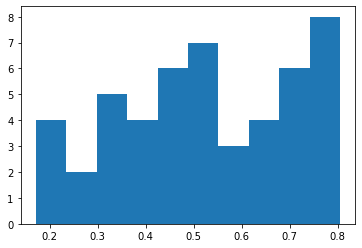

Time search : 17.711548259999972

Cross validation score :

roc_auc = 0.8615
precision 1 = 0.9341
recall 1 = 0.7522
f1 score 1 = 0.8333

              precision    recall  f1-score   support

           0      0.877     0.971     0.921       205
           1      0.934     0.752     0.833       113

    accuracy                          0.893       318
   macro avg      0.905     0.861     0.877       318
weighted avg      0.897     0.893     0.890       318

Time validation : 0.1908120370001143

tf-idf+SGDClassifier_ADJ_NOUN_VERB_DET Model : 

  Total time : 15.842 and n_iter : 9
Best parameters:  {'clf__alpha': 0.003636139689189061, 'clf__loss': 'log', 'clf__penalty': 'l2', 'vect__text__reduce_dim': TruncatedSVD(n_components=50), 'vect__text__tfidf__binary': False, 'vect__text__tfidf__lowercase': True, 'vect__text__tfidf__ngram_range': (1, 1), 'vect__text__tfidf__stop_words': True}
Mean cross-validated score of the best_estimator:  0.7999


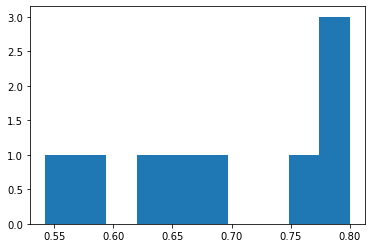

Time search : 16.02081159100021

Cross validation score :

roc_auc = 0.8793
precision 1 = 0.8624
recall 1 = 0.8319
f1 score 1 = 0.8468

              precision    recall  f1-score   support

           0      0.909     0.927     0.918       205
           1      0.862     0.832     0.847       113

    accuracy                          0.893       318
   macro avg      0.886     0.879     0.882       318
weighted avg      0.892     0.893     0.893       318

Time validation : 0.5046142099999997

tf-idf+Logistic_Regression_ADJ_NOUN_VERB_DET Model : 

  Total time : 16.645 and n_iter : 15
Best parameters:  {'clf__C': 0.8554523699493277, 'clf__penalty': 'l2', 'vect__text__reduce_dim': None, 'vect__text__tfidf__binary': False, 'vect__text__tfidf__lowercase': True, 'vect__text__tfidf__ngram_range': (1, 1), 'vect__text__tfidf__stop_words': True}
Mean cross-validated score of the best_estimator:  0.8537


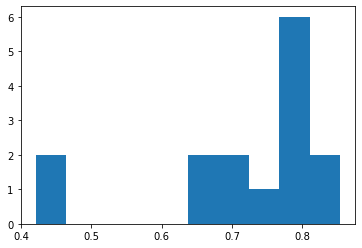

Time search : 16.817722024999966

Cross validation score :

roc_auc = 0.8763
precision 1 = 0.9091
recall 1 = 0.7965
f1 score 1 = 0.8491

              precision    recall  f1-score   support

           0      0.895     0.956     0.925       205
           1      0.909     0.796     0.849       113

    accuracy                          0.899       318
   macro avg      0.902     0.876     0.887       318
weighted avg      0.900     0.899     0.898       318

Time validation : 0.2229853290000392

tf-idf+Naive_Bayes_ADJ_NOUN_lem Model : 

  Total time : 17.067 and n_iter : 44
Best parameters:  {'clf__alpha': 0.06271985026452886, 'vect__tfidf__binary': False, 'vect__tfidf__lowercase': True, 'vect__tfidf__ngram_range': (1, 1), 'vect__tfidf__stop_words': True}
Mean cross-validated score of the best_estimator:  0.8055


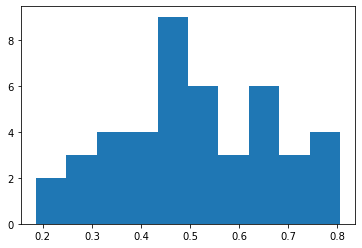

Time search : 17.20914631400001

Cross validation score :

roc_auc = 0.8639
precision 1 = 0.9444
recall 1 = 0.7522
f1 score 1 = 0.8374

              precision    recall  f1-score   support

           0      0.877     0.976     0.924       205
           1      0.944     0.752     0.837       113

    accuracy                          0.896       318
   macro avg      0.911     0.864     0.881       318
weighted avg      0.901     0.896     0.893       318

Time validation : 0.17528241600007277

tf-idf+SGDClassifier_ADJ_NOUN_lem Model : 

  Total time : 16.329 and n_iter : 17
Best parameters:  {'clf__alpha': 0.000698051712560409, 'clf__loss': 'log', 'clf__penalty': 'l1', 'vect__text__reduce_dim': None, 'vect__text__tfidf__binary': False, 'vect__text__tfidf__lowercase': True, 'vect__text__tfidf__ngram_range': (1, 3), 'vect__text__tfidf__stop_words': None}
Mean cross-validated score of the best_estimator:  0.7994


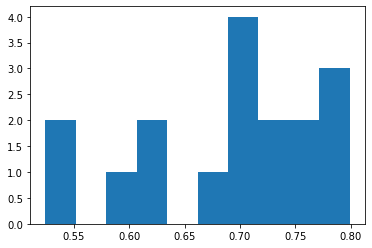

Time search : 16.52764553399993

Cross validation score :

roc_auc = 0.8296
precision 1 = 0.8889
recall 1 = 0.708
f1 score 1 = 0.7882

              precision    recall  f1-score   support

           0      0.855     0.951     0.901       205
           1      0.889     0.708     0.788       113

    accuracy                          0.865       318
   macro avg      0.872     0.830     0.844       318
weighted avg      0.867     0.865     0.861       318

Time validation : 0.9588646830000016

tf-idf+Logistic_Regression_ADJ_NOUN_lem Model : 

  Total time : 18.717 and n_iter : 16
Best parameters:  {'clf__C': 0.043836990861844755, 'clf__penalty': 'l2', 'vect__text__reduce_dim': TruncatedSVD(n_components=100), 'vect__text__tfidf__binary': True, 'vect__text__tfidf__lowercase': True, 'vect__text__tfidf__ngram_range': (1, 2), 'vect__text__tfidf__stop_words': None}
Mean cross-validated score of the best_estimator:  0.8083


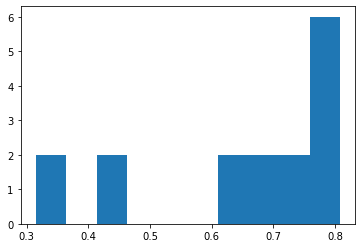

Time search : 18.867661190000035

Cross validation score :

roc_auc = 0.8438
precision 1 = 0.931
recall 1 = 0.7168
f1 score 1 = 0.81

              precision    recall  f1-score   support

           0      0.861     0.971     0.913       205
           1      0.931     0.717     0.810       113

    accuracy                          0.881       318
   macro avg      0.896     0.844     0.861       318
weighted avg      0.886     0.881     0.876       318

Time validation : 3.158233224000014

Fasttext_Attention Model : 

{'hidden_unit': 120, 'learning_rate': 0.001, 'dropout_rate': 0.4228548863616973}
oof_val score
f1
Metric
0.7642276422764228
  1%|          | 1/100 [01:02<1:42:32, 62.15s/trial, best loss: -0.7642276422764228]
Best parameters:  {'dropout_rate': 0.4228548863616973, 'hidden_unit': 120, 'learning_rate': 0.001}
Mean cross-validated score of the best_estimator:  0.7642

Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.


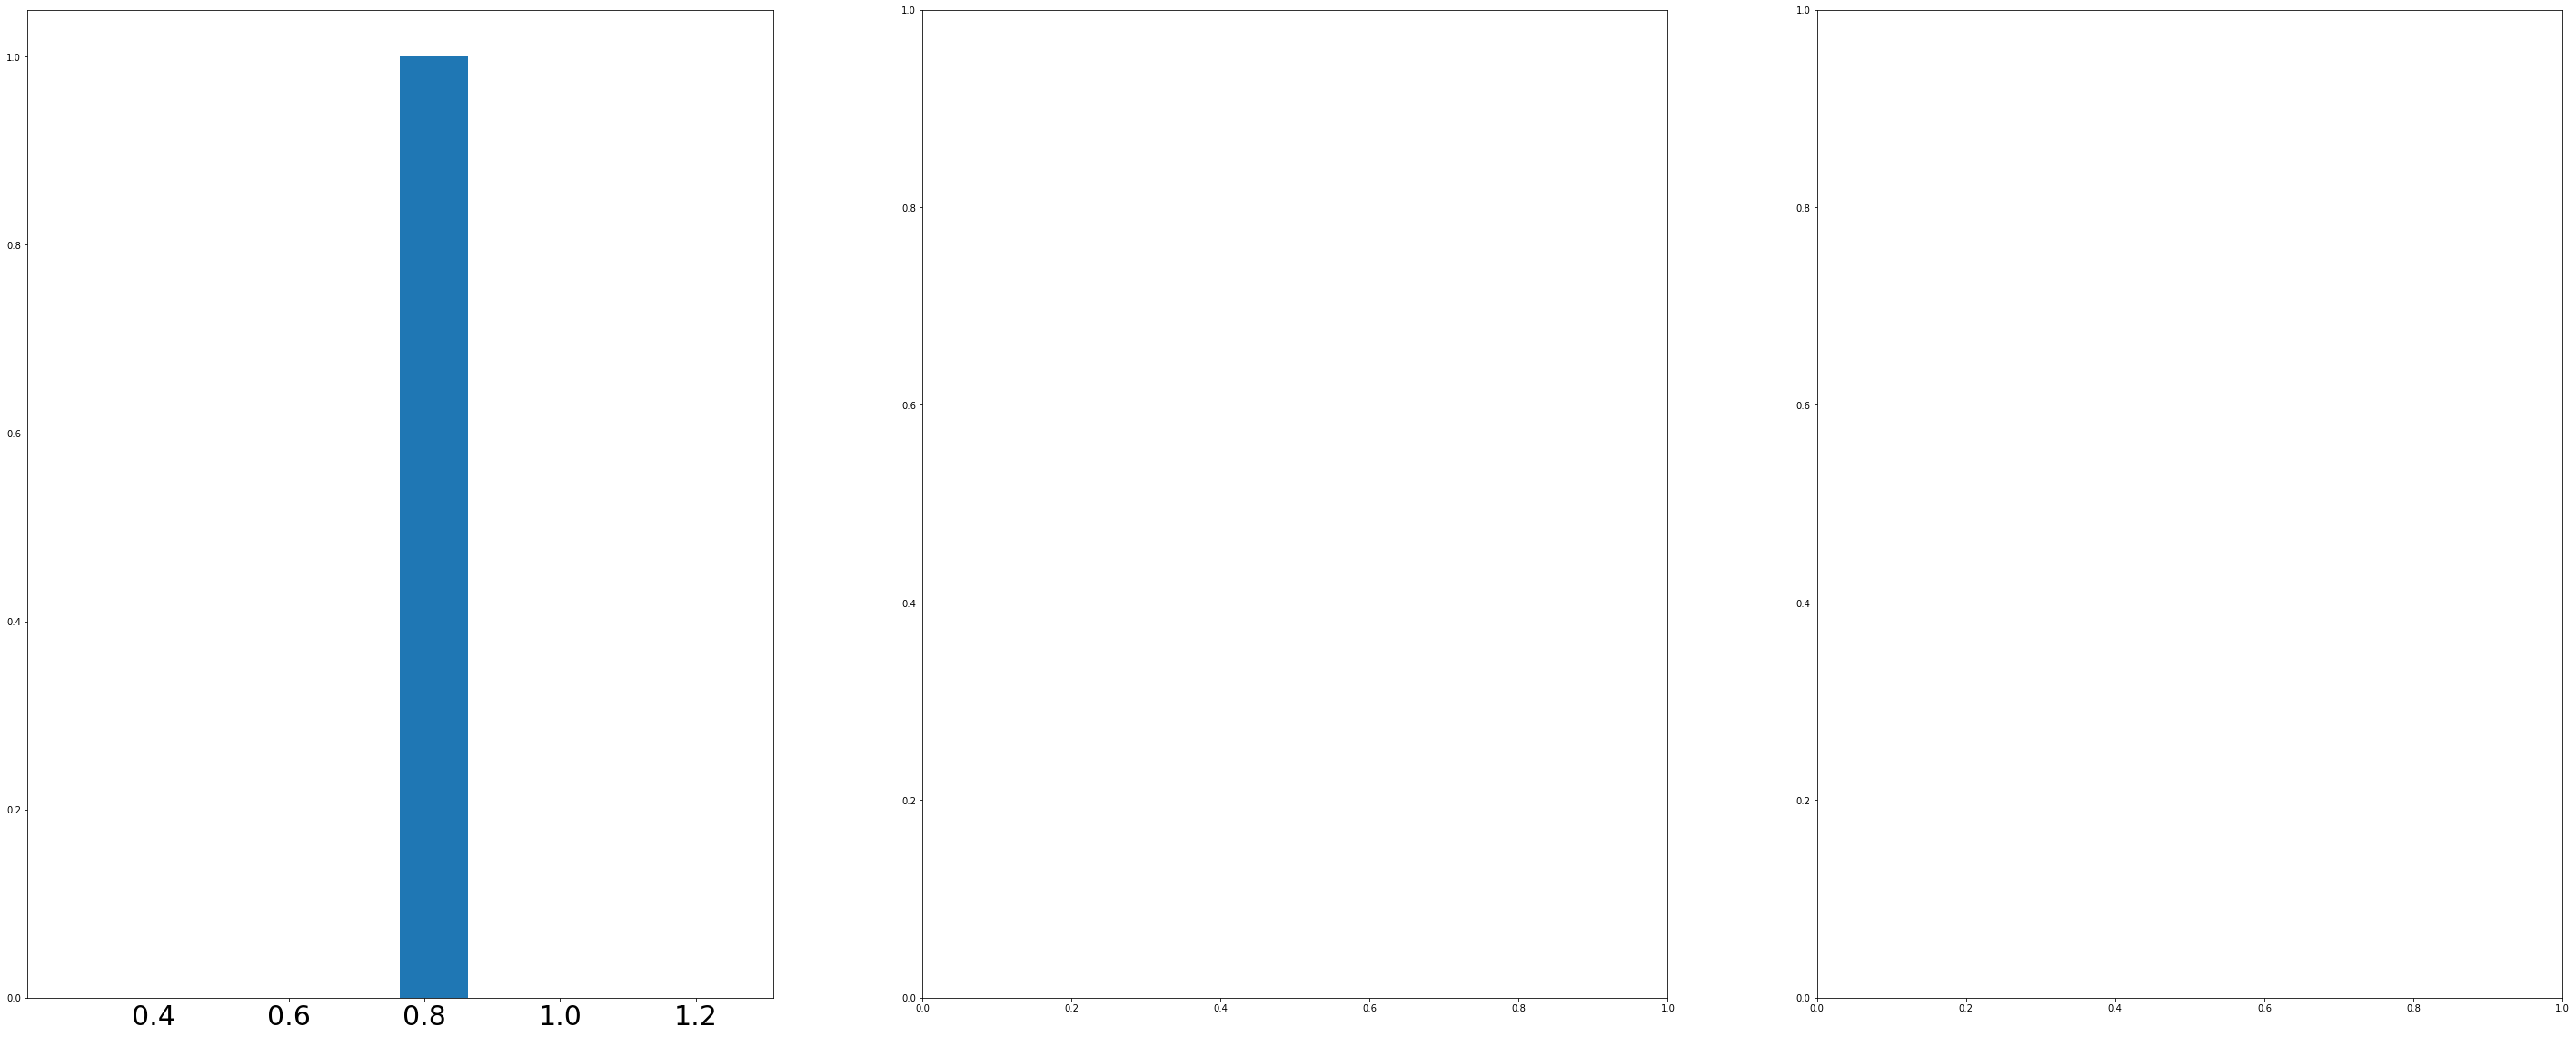

Time search : 74.43117764600015
Epoch 1/50
16/16 [==============================] - 4s 84ms/step - loss: 0.6471 - accuracy: 0.7061 - val_loss: 0.6034 - val_accuracy: 0.6406
Epoch 2/50
16/16 [==============================] - 1s 38ms/step - loss: 0.4799 - accuracy: 0.7829 - val_loss: 0.5796 - val_accuracy: 0.7500
Epoch 3/50
16/16 [==============================] - 1s 38ms/step - loss: 0.4141 - accuracy: 0.8548 - val_loss: 0.6202 - val_accuracy: 0.7656
Epoch 4/50
16/16 [==============================] - 1s 38ms/step - loss: 0.3076 - accuracy: 0.8595 - val_loss: 0.5940 - val_accuracy: 0.7500
Epoch 5/50
16/16 [==============================] - 1s 38ms/step - loss: 0.2133 - accuracy: 0.9542 - val_loss: 0.5255 - val_accuracy: 0.8281
Epoch 6/50
16/16 [==============================] - 1s 43ms/step - loss: 0.0791 - accuracy: 0.9873 - val_loss: 0.4834 - val_accuracy: 0.8594
Epoch 7/50
16/16 [==============================] - 1s 43ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.6656 - va

Downloading:   0%|          | 0.00/811k [00:00<?, ?B/s]

{'learning_rate': 0.001, 'dropout_rate': 0.268671024594361}
  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

Downloading:   0%|          | 0.00/508 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/545M [00:00<?, ?B/s]

Some layers from the model checkpoint at jplu/tf-camembert-base were not used when initializing TFCamembertModel: ['lm_head']
- This IS expected if you are initializing TFCamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFCamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFCamembertModel were initialized from the model checkpoint at jplu/tf-camembert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertModel for predictions without further training.
Some layers from the model checkpoint at jplu/tf-camembert-base were not used when initializing TFCamembertModel: ['lm_head']
- This IS expecte

oof_val score
f1
Metric
-0.0
  1%|          | 1/100 [04:34<7:32:19, 274.14s/trial, best loss: 0.0]
Best parameters:  {'dropout_rate': 0.268671024594361, 'learning_rate': 0.001}
Mean cross-validated score of the best_estimator:  -0.0


Some layers from the model checkpoint at jplu/tf-camembert-base were not used when initializing TFCamembertModel: ['lm_head']
- This IS expected if you are initializing TFCamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFCamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFCamembertModel were initialized from the model checkpoint at jplu/tf-camembert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertModel for predictions without further training.



Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.


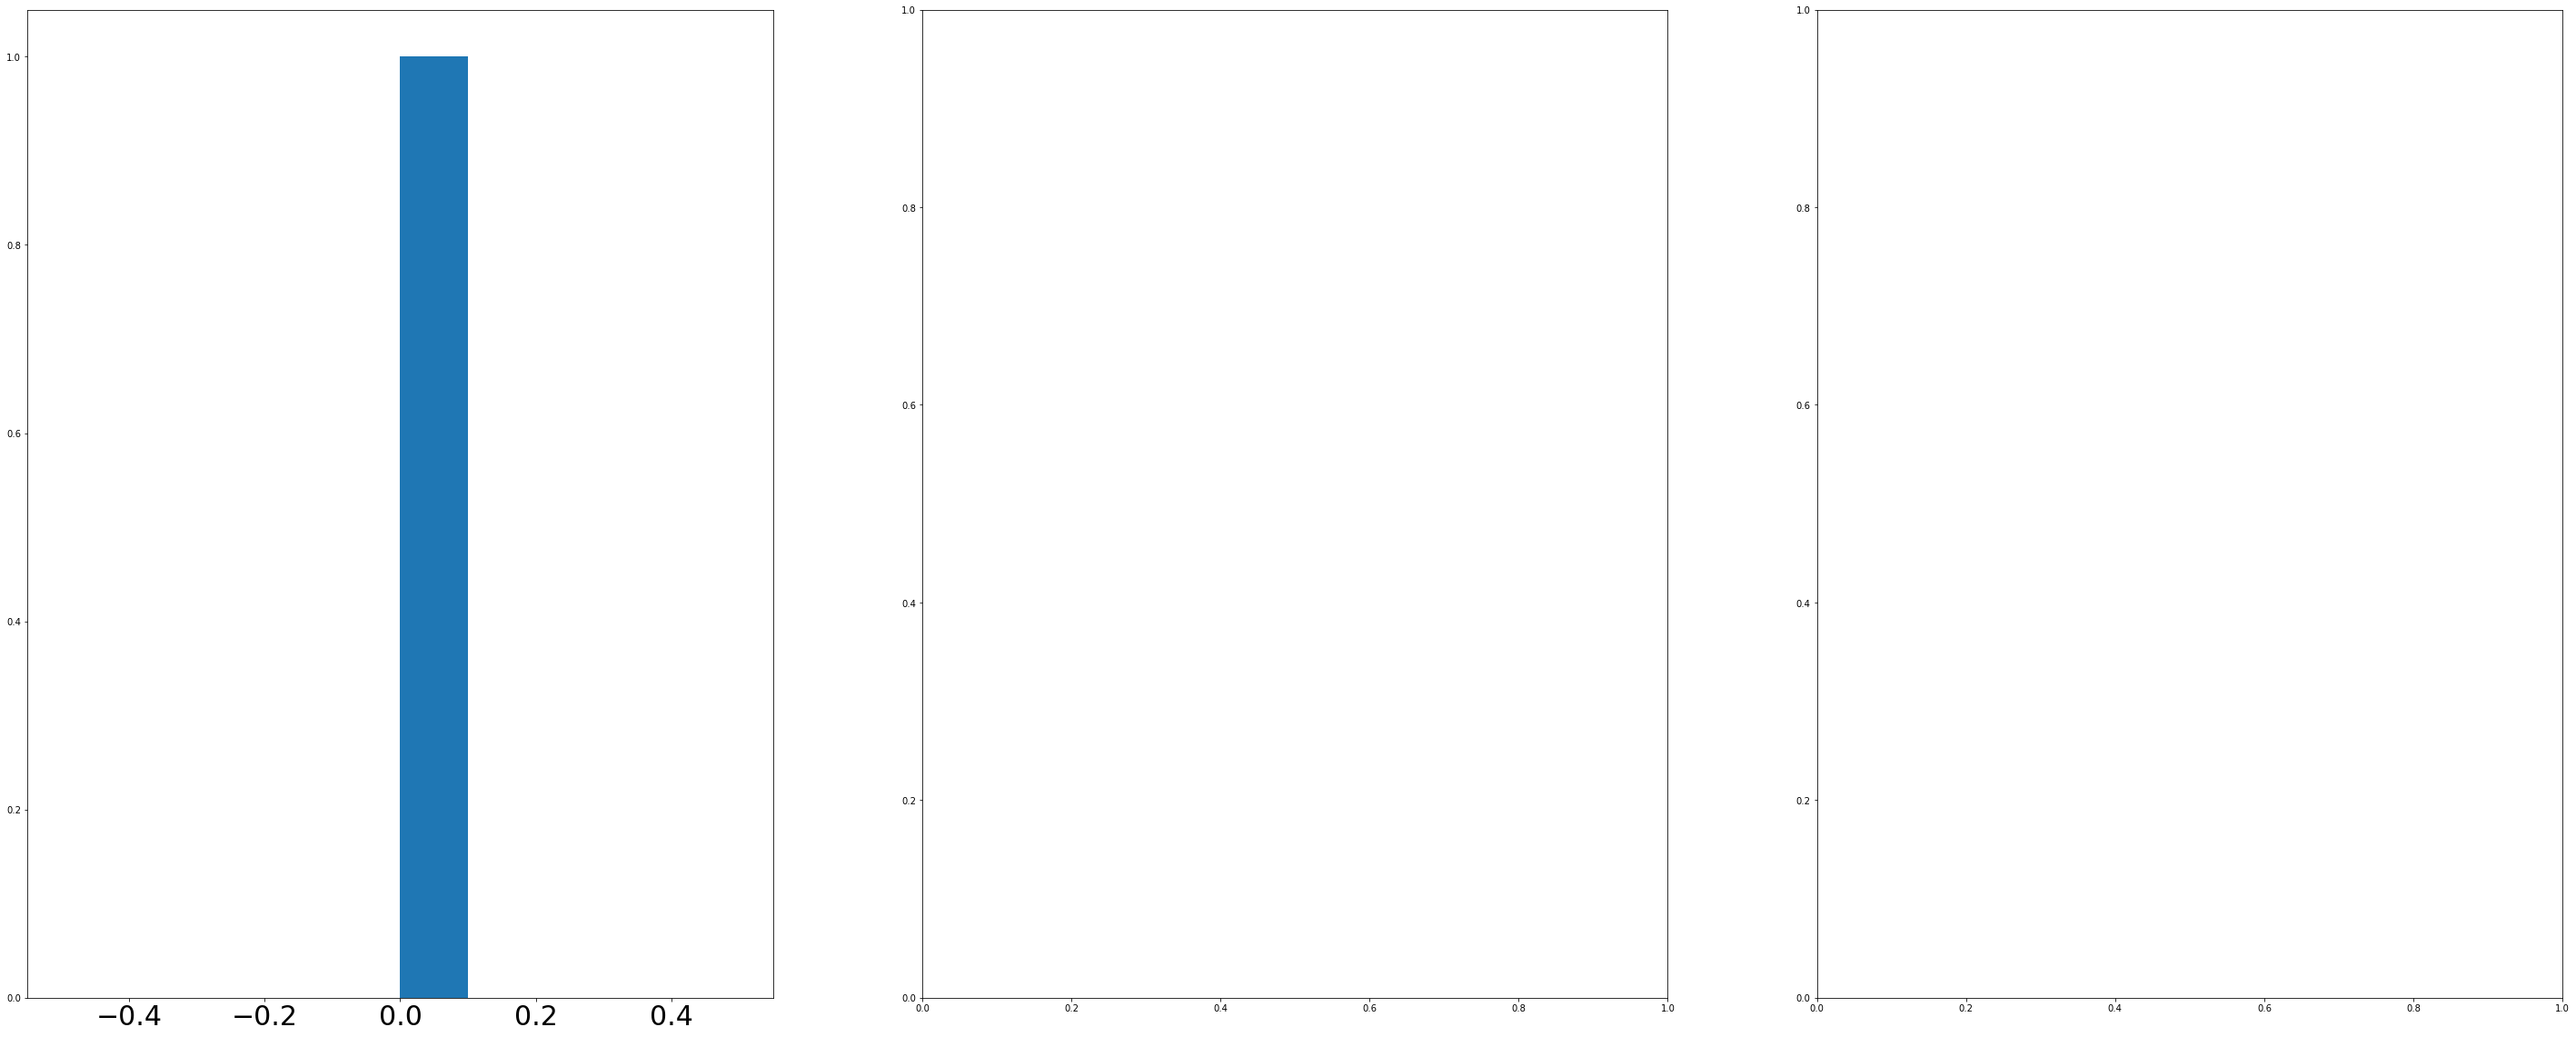

Time search : 350.65379559100006


Some layers from the model checkpoint at jplu/tf-camembert-base were not used when initializing TFCamembertModel: ['lm_head']
- This IS expected if you are initializing TFCamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFCamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFCamembertModel were initialized from the model checkpoint at jplu/tf-camembert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertModel for predictions without further training.


Epoch 1/50
16/16 [==============================] - 22s 386ms/step - loss: 0.8579 - accuracy: 0.5372 - val_loss: 0.6997 - val_accuracy: 0.3438
Epoch 2/50
16/16 [==============================] - 4s 275ms/step - loss: 0.7396 - accuracy: 0.4095 - val_loss: 0.6903 - val_accuracy: 0.6562
Epoch 3/50
16/16 [==============================] - 4s 267ms/step - loss: 0.6900 - accuracy: 0.5010 - val_loss: 0.7267 - val_accuracy: 0.3438
Epoch 4/50
16/16 [==============================] - 4s 268ms/step - loss: 0.6935 - accuracy: 0.5397 - val_loss: 0.7270 - val_accuracy: 0.3438
Epoch 5/50
16/16 [==============================] - 4s 271ms/step - loss: 0.6968 - accuracy: 0.3638 - val_loss: 0.6945 - val_accuracy: 0.3438

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 6/50
16/16 [==============================] - 4s 268ms/step - loss: 0.7049 - accuracy: 0.3768 - val_loss: 0.6948 - val_accuracy: 0.3438
Kfold # 0  : train loss = 0.787026047706604  and val loss = 0.690

Some layers from the model checkpoint at jplu/tf-camembert-base were not used when initializing TFCamembertModel: ['lm_head']
- This IS expected if you are initializing TFCamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFCamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFCamembertModel were initialized from the model checkpoint at jplu/tf-camembert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertModel for predictions without further training.


Epoch 1/50
16/16 [==============================] - 21s 374ms/step - loss: 0.9807 - accuracy: 0.4707 - val_loss: 0.6391 - val_accuracy: 0.6875
Epoch 2/50
16/16 [==============================] - 4s 267ms/step - loss: 0.7624 - accuracy: 0.3349 - val_loss: 0.6519 - val_accuracy: 0.6875
Epoch 3/50
16/16 [==============================] - 4s 266ms/step - loss: 0.6965 - accuracy: 0.5967 - val_loss: 0.7501 - val_accuracy: 0.3125
Epoch 4/50
16/16 [==============================] - 4s 272ms/step - loss: 0.6934 - accuracy: 0.4920 - val_loss: 0.7663 - val_accuracy: 0.3125

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/50
16/16 [==============================] - 4s 273ms/step - loss: 0.7042 - accuracy: 0.3466 - val_loss: 0.7510 - val_accuracy: 0.3125
Kfold # 1  : train loss = 0.8672980070114136  and val loss = 0.6390566825866699


Some layers from the model checkpoint at jplu/tf-camembert-base were not used when initializing TFCamembertModel: ['lm_head']
- This IS expected if you are initializing TFCamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFCamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFCamembertModel were initialized from the model checkpoint at jplu/tf-camembert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertModel for predictions without further training.


Epoch 1/50
16/16 [==============================] - 20s 374ms/step - loss: 1.1632 - accuracy: 0.4084 - val_loss: 0.8737 - val_accuracy: 0.3750
Epoch 2/50
16/16 [==============================] - 4s 274ms/step - loss: 0.7287 - accuracy: 0.4498 - val_loss: 0.6709 - val_accuracy: 0.6250
Epoch 3/50
16/16 [==============================] - 4s 271ms/step - loss: 0.7136 - accuracy: 0.4848 - val_loss: 0.6706 - val_accuracy: 0.6250
Epoch 4/50
16/16 [==============================] - 4s 272ms/step - loss: 0.7171 - accuracy: 0.5981 - val_loss: 0.7238 - val_accuracy: 0.3750
Epoch 5/50
16/16 [==============================] - 4s 267ms/step - loss: 0.6955 - accuracy: 0.4921 - val_loss: 0.6870 - val_accuracy: 0.6250
Epoch 6/50
16/16 [==============================] - 4s 267ms/step - loss: 0.7122 - accuracy: 0.4043 - val_loss: 0.6738 - val_accuracy: 0.6250

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 7/50
16/16 [==============================] - 4s 270ms/step

Some layers from the model checkpoint at jplu/tf-camembert-base were not used when initializing TFCamembertModel: ['lm_head']
- This IS expected if you are initializing TFCamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFCamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFCamembertModel were initialized from the model checkpoint at jplu/tf-camembert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertModel for predictions without further training.


Epoch 1/50
16/16 [==============================] - 22s 459ms/step - loss: 0.9219 - accuracy: 0.6188 - val_loss: 0.6720 - val_accuracy: 0.6032
Epoch 2/50
16/16 [==============================] - 4s 274ms/step - loss: 0.7171 - accuracy: 0.6528 - val_loss: 0.7830 - val_accuracy: 0.3968
Epoch 3/50
16/16 [==============================] - 4s 275ms/step - loss: 0.6985 - accuracy: 0.4787 - val_loss: 0.6718 - val_accuracy: 0.6032
Epoch 4/50
16/16 [==============================] - 5s 284ms/step - loss: 0.7159 - accuracy: 0.5266 - val_loss: 0.6993 - val_accuracy: 0.3968
Epoch 5/50
16/16 [==============================] - 4s 275ms/step - loss: 0.7025 - accuracy: 0.5868 - val_loss: 0.6990 - val_accuracy: 0.3968
Epoch 6/50
16/16 [==============================] - 4s 278ms/step - loss: 0.6850 - accuracy: 0.4509 - val_loss: 0.7514 - val_accuracy: 0.3968

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 7/50
16/16 [==============================] - 4s 276ms/step

Some layers from the model checkpoint at jplu/tf-camembert-base were not used when initializing TFCamembertModel: ['lm_head']
- This IS expected if you are initializing TFCamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFCamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFCamembertModel were initialized from the model checkpoint at jplu/tf-camembert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertModel for predictions without further training.


Epoch 1/50
16/16 [==============================] - 23s 472ms/step - loss: 1.0174 - accuracy: 0.5374 - val_loss: 0.6653 - val_accuracy: 0.6508
Epoch 2/50
16/16 [==============================] - 4s 274ms/step - loss: 0.6764 - accuracy: 0.4956 - val_loss: 0.7670 - val_accuracy: 0.3492
Epoch 3/50
16/16 [==============================] - 4s 274ms/step - loss: 0.7063 - accuracy: 0.3938 - val_loss: 0.6522 - val_accuracy: 0.6508
Epoch 4/50
16/16 [==============================] - 4s 276ms/step - loss: 0.7134 - accuracy: 0.5925 - val_loss: 0.7099 - val_accuracy: 0.3492
Epoch 5/50
16/16 [==============================] - 4s 275ms/step - loss: 0.6834 - accuracy: 0.4718 - val_loss: 0.7225 - val_accuracy: 0.3492
Epoch 6/50
16/16 [==============================] - 4s 282ms/step - loss: 0.7100 - accuracy: 0.3806 - val_loss: 0.6600 - val_accuracy: 0.6508

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 7/50
16/16 [==============================] - 4s 277ms/step

In [9]:
bml.train()

# Ensemble

In [10]:
bml.ensemble()


Blend Model : 


Cross validation score :

roc_auc = 0.9603
precision 1 = 0.9565
recall 1 = 0.7788
f1 score 1 = 0.8585

              precision    recall  f1-score   support

           0      0.889     0.980     0.933       205
           1      0.957     0.779     0.859       113

    accuracy                          0.909       318
   macro avg      0.923     0.880     0.896       318
weighted avg      0.913     0.909     0.906       318



# Leaderboard (Validation score)

In [11]:
leaderboard_val = bml.get_leaderboard(sort_by = sort_leaderboard, dataset = 'val')
leaderboard_val

,name,accuracy_val,recall_val,precision_val,f1_val,roc_auc_val
11,BlendModel,0.9088,0.7788,0.9565,0.8585,0.9603
5,tf-idf+Logistic_Regression_ADJ_NOUN_VERB_DET,0.8994,0.7965,0.9091,0.8491,0.8763
4,tf-idf+SGDClassifier_ADJ_NOUN_VERB_DET,0.8931,0.8319,0.8624,0.8468,0.8793
6,tf-idf+Naive_Bayes_ADJ_NOUN_lem,0.8962,0.7522,0.9444,0.8374,0.8639
2,tf-idf+Logistic_Regression,0.8836,0.8407,0.8333,0.8370,0.8740
3,tf-idf+Naive_Bayes_ADJ_NOUN_VERB_DET,0.8931,0.7522,0.9341,0.8333,0.8615
1,tf-idf+SGDClassifier,0.8711,0.8319,0.8103,0.8210,0.8623
8,tf-idf+Logistic_Regression_ADJ_NOUN_lem,0.8805,0.7168,0.9310,0.8100,0.8438
9,Fasttext_Attention,0.8648,0.7788,0.8302,0.8037,0.8455
7,tf-idf+SGDClassifier_ADJ_NOUN_lem,0.8648,0.7080,0.8889,0.7882,0.8296


In [12]:
df_oof_val = bml.Y_train.copy()
for name in bml.models.keys():
    df_oof_val[name] = bml.models[name].info_scores['oof_val']
df_oof_val

,sentiment,tf-idf+Naive_Bayes,tf-idf+SGDClassifier,tf-idf+Logistic_Regression,tf-idf+Naive_Bayes_ADJ_NOUN_VERB_DET,tf-idf+SGDClassifier_ADJ_NOUN_VERB_DET,tf-idf+Logistic_Regression_ADJ_NOUN_VERB_DET,tf-idf+Naive_Bayes_ADJ_NOUN_lem,tf-idf+SGDClassifier_ADJ_NOUN_lem,tf-idf+Logistic_Regression_ADJ_NOUN_lem,Fasttext_Attention,BERT,BlendModel
353,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
21,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.909091
216,1,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.636364
67,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.909091
131,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.909091
180,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.090909
327,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
231,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.909091


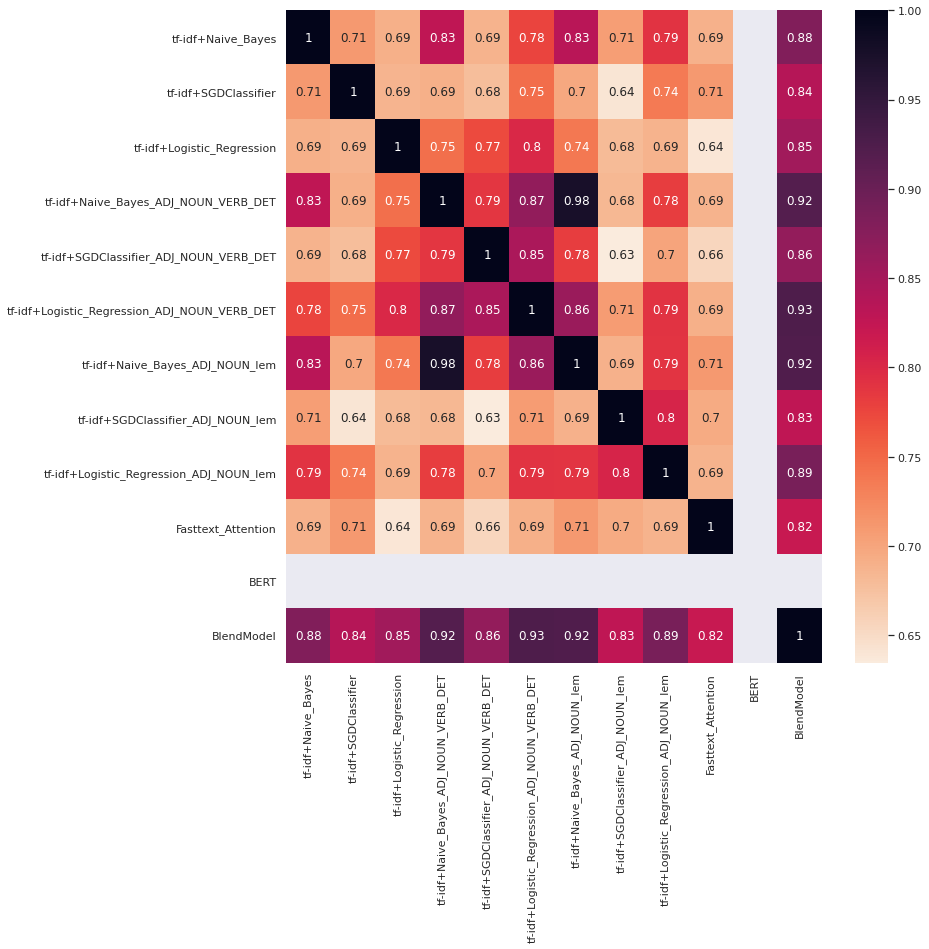

In [13]:
# correlation between oof_val predictions
bml.correlation_models()

In [14]:
df_all_results = bml.get_df_all_results()
df_all_results

,mean_fit_time,params,mean_test_score,std_test_score,model
0,0.071596,"{'clf__alpha': 0.006645763131179594, 'vect__tf...",0.786669,0.086606,tf-idf+Naive_Bayes
1,0.049265,"{'clf__alpha': 0.0719743992132591, 'vect__tfid...",0.770206,0.073128,tf-idf+Naive_Bayes
2,0.030967,"{'clf__alpha': 0.21691037136268343, 'vect__tfi...",0.765920,0.050187,tf-idf+Naive_Bayes
3,0.051254,"{'clf__alpha': 0.1210207304404115, 'vect__tfid...",0.762122,0.075398,tf-idf+Naive_Bayes
4,0.104442,"{'clf__alpha': 0.1808552883351644, 'vect__tfid...",0.701534,0.066260,tf-idf+Naive_Bayes
...,...,...,...,...,...
214,0.139865,"{'clf__C': 0.04815186579708908, 'clf__penalty'...",0.420771,0.210429,tf-idf+Logistic_Regression_ADJ_NOUN_lem
215,0.107557,"{'clf__C': 0.07977643360599601, 'clf__penalty'...",0.315024,0.257248,tf-idf+Logistic_Regression_ADJ_NOUN_lem
216,0.136297,"{'clf__C': 0.07144947201399252, 'clf__penalty'...",0.315024,0.257248,tf-idf+Logistic_Regression_ADJ_NOUN_lem
217,62.131399,"{'dropout_rate': 0.4228548863616973, 'hidden_u...",0.764228,0.000000,Fasttext_Attention


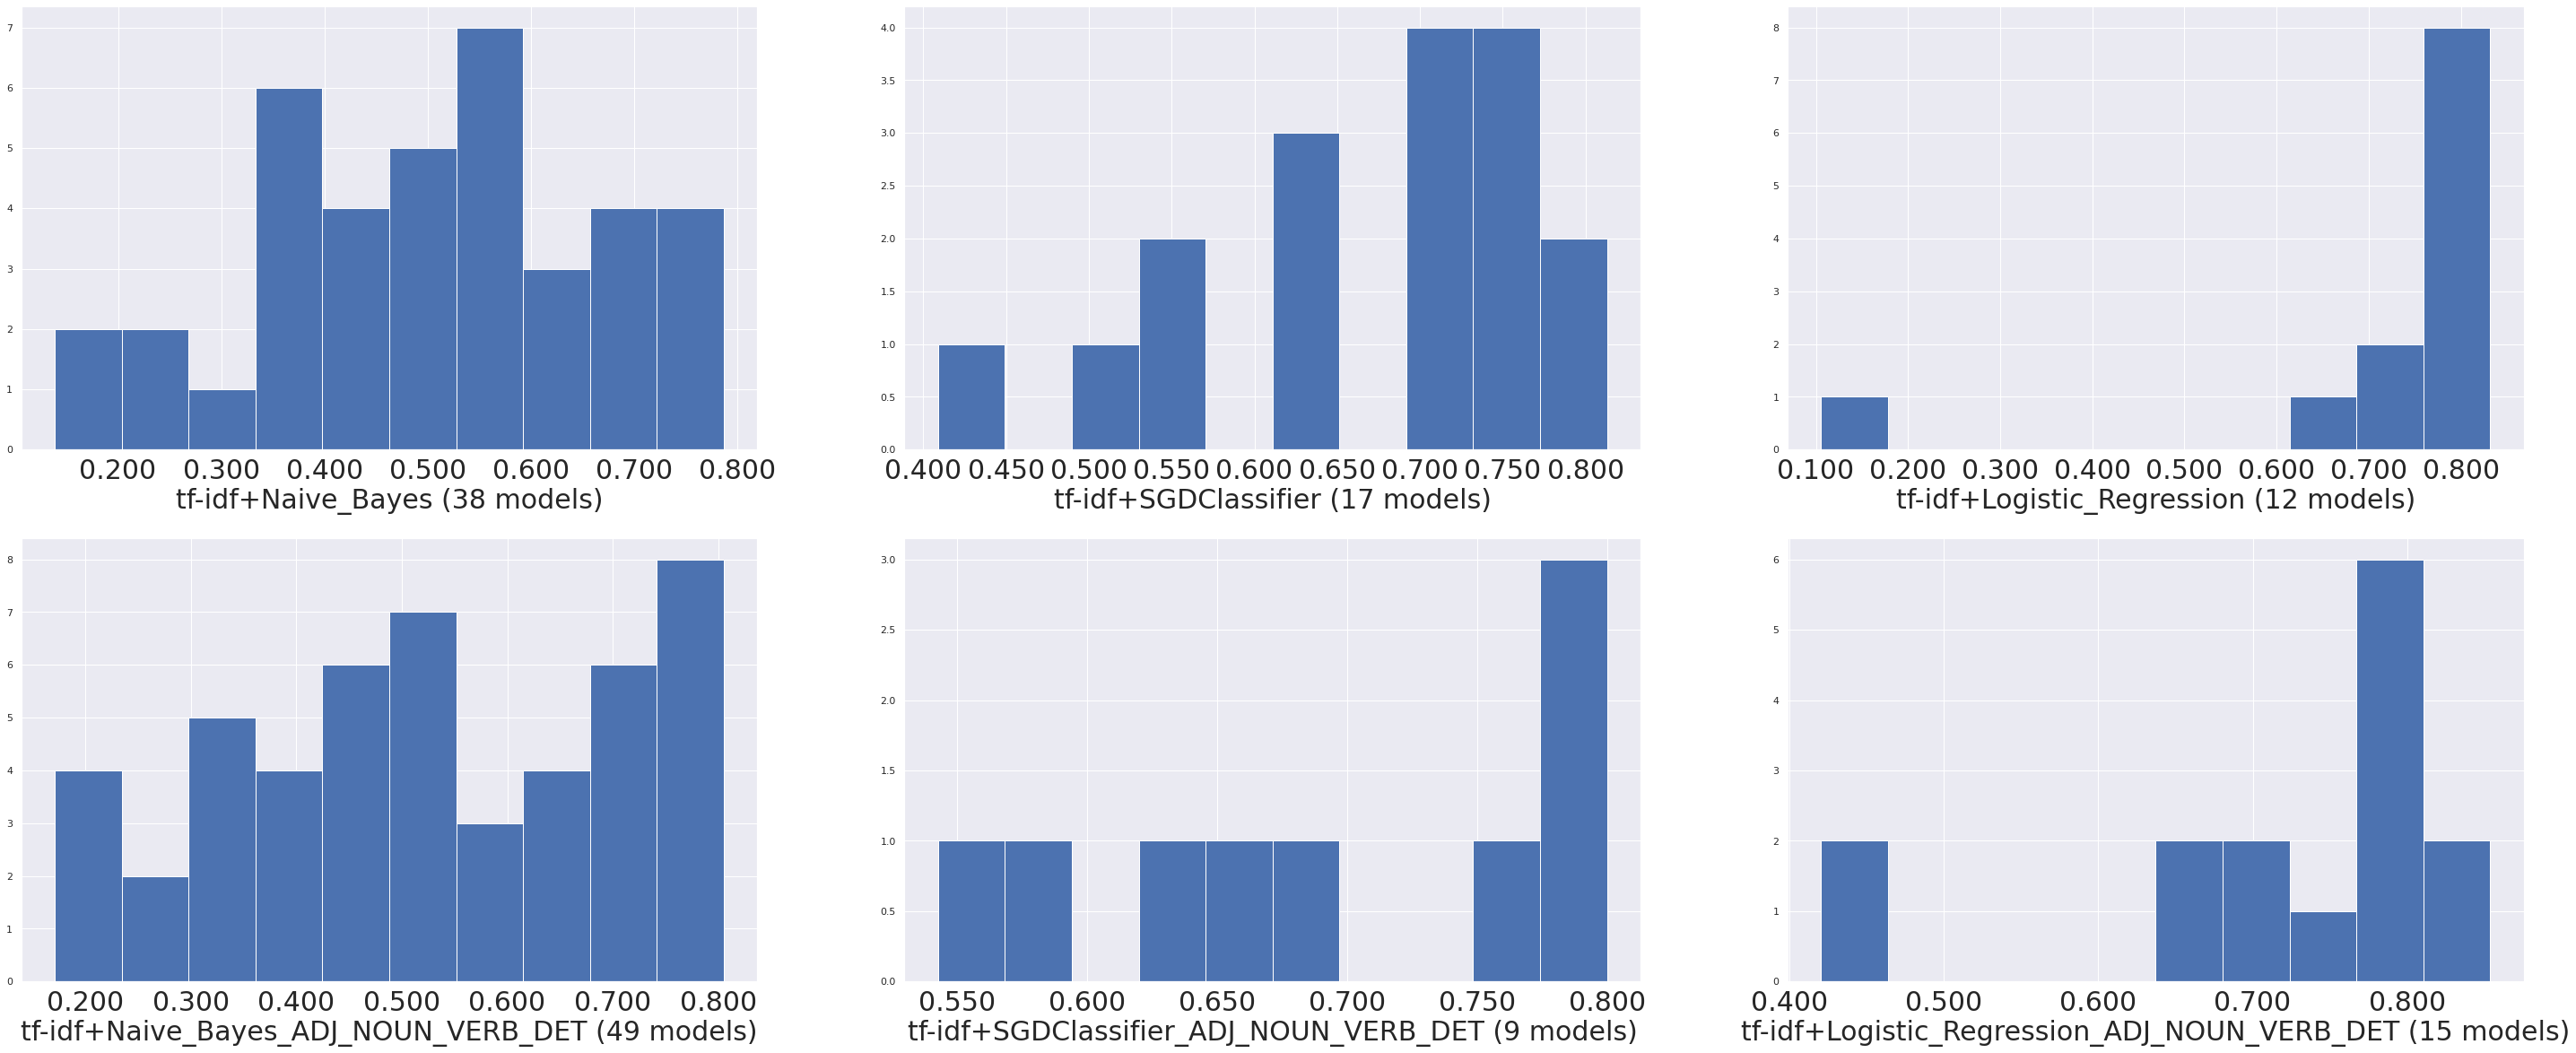

In [15]:
bml.show_distribution_scores()

In [16]:
if 'binary_proba' in bml.objective:
        bml.get_roc_curves()

# Testing

In [17]:
on_test_data = True
bml.leader_predict(on_test_data)  # or bml.leader_predict(aml.X_test, aml.Y_test)

In [18]:
leaderboard_test = bml.get_leaderboard(sort_by=sort_leaderboard, dataset='test')
leaderboard_test

,name,accuracy_test,recall_test,precision_test,f1_test,roc_auc_test
11,BlendModel,0.9000,0.7083,0.9444,0.8095,0.9107
5,tf-idf+Logistic_Regression_ADJ_NOUN_VERB_DET,0.8750,0.7917,0.7917,0.7917,0.8512
1,tf-idf+SGDClassifier,0.8625,0.8333,0.7407,0.7843,0.8542
9,Fasttext_Attention,0.8625,0.7500,0.7826,0.7660,0.8304
0,tf-idf+Naive_Bayes,0.8625,0.6250,0.8824,0.7317,0.7946
8,tf-idf+Logistic_Regression_ADJ_NOUN_lem,0.8625,0.6250,0.8824,0.7317,0.7946
3,tf-idf+Naive_Bayes_ADJ_NOUN_VERB_DET,0.8375,0.6667,0.7619,0.7111,0.7887
6,tf-idf+Naive_Bayes_ADJ_NOUN_lem,0.8375,0.6667,0.7619,0.7111,0.7887
7,tf-idf+SGDClassifier_ADJ_NOUN_lem,0.8375,0.6667,0.7619,0.7111,0.7887
2,tf-idf+Logistic_Regression,0.8125,0.7500,0.6667,0.7059,0.7946


In [19]:
df_prediction = bml.dataframe_predictions
df_prediction

,y_true,tf-idf+Naive_Bayes,tf-idf+SGDClassifier,tf-idf+Logistic_Regression,tf-idf+Naive_Bayes_ADJ_NOUN_VERB_DET,tf-idf+SGDClassifier_ADJ_NOUN_VERB_DET,tf-idf+Logistic_Regression_ADJ_NOUN_VERB_DET,tf-idf+Naive_Bayes_ADJ_NOUN_lem,tf-idf+SGDClassifier_ADJ_NOUN_lem,tf-idf+Logistic_Regression_ADJ_NOUN_lem,Fasttext_Attention,BERT,BlendModel
0,1,0,0,0,0,1,1,0,0,0,1,0,0.273
1,0,0,0,1,0,0,0,0,0,0,0,0,0.091
2,0,0,0,1,0,0,0,0,0,0,0,0,0.091
3,1,1,1,1,1,1,1,1,1,1,1,0,0.909
4,0,0,0,1,1,0,0,1,0,0,1,0,0.364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,0,0,0,0,0,0,0,0,0,0,0,0.000
76,0,0,0,0,0,0,0,0,0,0,0,0,0.000
77,0,0,0,0,0,0,0,0,0,0,0,0,0.000
78,0,0,0,1,0,1,0,0,0,0,0,0,0.182


# Extraction of influent words 

In [20]:
from extraction_words import *

In [21]:
pr = {0: 'NEGATIVE', 1: 'POSITIVE'}
n_influent_word = 10
type_data = 'train'  # 'test'

In [22]:
if 'Fasttext_Attention' in bml.models.keys() or 'BERT' in bml.models.keys():
    extract_influent_word(bml, type_data, n_influent_word, pr)